In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel ('C:/Users/Owner/OneDrive/Documents/Muzmatch Reviews.xlsx')
# adding an row_id field to the dataframe, which will be useful for joining later
df["row_id"] = df.index + 1
#print first 10 rows 
print (df.head(10))

                                            Response  row_id
0  Ok last time I reviewed I gave this a 3/5. It’...       1
1  Earlier was better. I got lucky that when I fi...       2
2  Alhamdulilah, I got a lot of amazing matches a...       3
3  I get likes all the time. I respond fairly qui...       4
4  This app has improved a lot since I first down...       5
5  The only beef I have with this app is the filt...       6
6  There are just so many abandoned profiles. The...       7
7  The app is cool and is definitely one my favor...       8
8  I loved this app because it gave me access to ...       9
9  Lovely app. Much thanks to the developers. I h...      10


In [3]:
#create a new data frame with "id" and "comment" fields
df_subset = df[['row_id', 'Response']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Response'] = df_subset['Response'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Response'] = df_subset['Response'].str.casefold()
print (df_subset.head(10))

   row_id                                           Response
0       1  ok last time i reviewed i gave this a      it ...
1       2  earlier was better  i got lucky that when i fi...
2       3  alhamdulilah  i got a lot of amazing matches a...
3       4  i get likes all the time  i respond fairly qui...
4       5  this app has improved a lot since i first down...
5       6  the only beef i have with this app is the filt...
6       7  there are just so many abandoned profiles  the...
7       8  the app is cool and is definitely one my favor...
8       9  i loved this app because it gave me access to ...
9      10  lovely app  much thanks to the developers  i h...


C:\Users\Owner\AppData\Local\Temp/ipykernel_20892/378196962.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Response'] = df_subset['Response'].str.replace("[^a-zA-Z#]", " ")


In [4]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [5]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
   row_id sentiment_type  sentiment_score
0       1       compound           0.9909
0       2       compound           0.9534
0       3       compound           0.9968
0       4       compound           0.8516
0       5       compound           0.3818
0       6       compound           0.2960
0       7       compound           0.8062
0       8       compound           0.9719
0       9       compound          -0.6382
0      10       compound           0.9093


In [6]:
#merge dataframes
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))

                                            Response  row_id sentiment_type  \
0  Ok last time I reviewed I gave this a 3/5. It’...       1       compound   
1  Earlier was better. I got lucky that when I fi...       2       compound   
2  Alhamdulilah, I got a lot of amazing matches a...       3       compound   
3  I get likes all the time. I respond fairly qui...       4       compound   
4  This app has improved a lot since I first down...       5       compound   
5  The only beef I have with this app is the filt...       6       compound   
6  There are just so many abandoned profiles. The...       7       compound   
7  The app is cool and is definitely one my favor...       8       compound   
8  I loved this app because it gave me access to ...       9       compound   
9  Lovely app. Much thanks to the developers. I h...      10       compound   

   sentiment_score  
0           0.9909  
1           0.9534  
2           0.9968  
3           0.8516  
4           0.3818  
5   

In [7]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,38.000000
mean,0.445568
std,0.622068
min,-0.959000
25%,0.296000
50%,0.751550
75%,0.905750
max,0.996800


<AxesSubplot:>

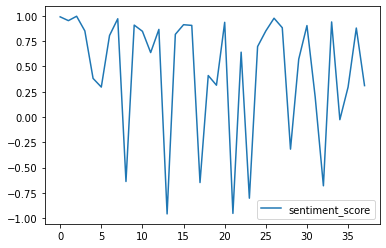

In [8]:
df_output[["sentiment_score"]].plot()